In [2]:
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.patches import Arc
from matplotlib.transforms import Affine2D

### Snippet: 513
# https://gitlab.ethz.ch/socceranalytics/uefa-euro-2020/-/snippets/513


def draw_pitch(
    ax: Axes,
    pitch_center: tuple = (0, 34),
    pitch_length: float = 105,
    pitch_width: float = 68,
    linewidth: float = 1.2,
    linecolor="black",
    background_color=None,
    zorder: int = -10,
    orient_vertical: bool = False,
):
    """Draw a football pitch on a given axes.

    The pitch is fitted according to the provided center and width/length arguments.
    Scale is not guaranteed.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axes to draw the pitch on
    pitch_center : tuple
        Center of the pitch, by default (0, 34). The center is the point in the
        middle of the pitch, lengthwise and widthwise respectively. If orient_vertical
        is False (default), this translates to x and y axes.
    pitch_length : float
        Length of the pitch, by default 105
    pitch_width : float
        Width of the pitch, by default 68
    linewidth : float
        Width of the lines, passed to plot calls and patch initializations, by default 1.2
    linecolor : color
        Color of the lines, passed to plot calls and patch initializations, by default "black"
    background_color : color
        Color of the plot background as a matplotlib color, by default None
    zorder : int, optional
        Plotting order of the pitch on the axes, by default -10
    orient_vertical : bool, optional
        Change the pitch orientation to vertical, by default False
    """
    if orient_vertical:
        transform = Affine2D().rotate_deg(90).scale(-1, 1) + ax.transData
    else:
        transform = ax.transData

    x = lambda x: (x / 130) * pitch_length + pitch_center[0] - pitch_length / 2
    y = lambda y: (y / 90) * pitch_width + pitch_center[1] - pitch_width / 2

    rat_x = pitch_length / 130
    rat_y = pitch_width / 90

    plot_arguments = dict(
        color=linecolor, zorder=zorder, transform=transform, linewidth=linewidth
    )

    # Pitch Outline & Centre Line
    ax.plot([x(0), x(0)], [y(0), y(90)], **plot_arguments)
    ax.plot([x(0), x(130)], [y(90), y(90)], **plot_arguments)
    ax.plot([x(130), x(130)], [y(90), y(0)], **plot_arguments)
    ax.plot([x(130), x(0)], [y(0), y(0)], **plot_arguments)
    ax.plot([x(65), x(65)], [y(0), y(90)], **plot_arguments)

    # Left Penalty Area
    ax.plot([x(16.5), x(16.5)], [y(65), y(25)], **plot_arguments)
    ax.plot([x(0), x(16.5)], [y(65), y(65)], **plot_arguments)
    ax.plot([x(16.5), x(0)], [y(25), y(25)], **plot_arguments)

    # Right Penalty Area
    ax.plot([x(130), x(113.5)], [y(65), y(65)], **plot_arguments)
    ax.plot([x(113.5), x(113.5)], [y(65), y(25)], **plot_arguments)
    ax.plot([x(113.5), x(130)], [y(25), y(25)], **plot_arguments)

    # Left 6-yard Box
    ax.plot([x(0), x(5.5)], [y(54), y(54)], **plot_arguments)
    ax.plot([x(5.5), x(5.5)], [y(54), y(36)], **plot_arguments)
    ax.plot([x(5.5), x(0.5)], [y(36), y(36)], **plot_arguments)

    # Right 6-yard Box
    ax.plot([x(130), x(124.5)], [y(54), y(54)], **plot_arguments)
    ax.plot([x(124.5), x(124.5)], [y(54), y(36)], **plot_arguments)
    ax.plot([x(124.5), x(130)], [y(36), y(36)], **plot_arguments)

    # Prepare circles
    centre_circle = plt.Circle((x(65), y(45)), 9.15, fill=False, **plot_arguments)
    centre_spot = plt.Circle((x(65), y(45)), linewidth / 2, **plot_arguments)
    left_pen_spot = plt.Circle((x(11), y(45)), linewidth / 4, **plot_arguments)
    right_pen_spot = plt.Circle((x(119), y(45)), linewidth / 4, **plot_arguments)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc(
        (x(11), y(45)),
        height=18.3 * rat_y,
        width=18.3 * rat_x,
        angle=0,
        theta1=312,
        theta2=48,
        **plot_arguments,
    )
    right_arc = Arc(
        (x(119), y(45)),
        height=18.3 * rat_y,
        width=18.3 * rat_x,
        angle=0,
        theta1=128,
        theta2=232,
        **plot_arguments,
    )

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    if background_color is not None:
        ax.set_facecolor(background_color)

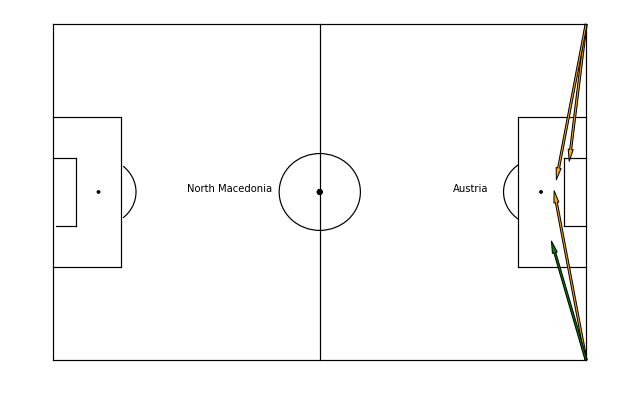

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes

events = json.loads(open("../../data/statsbomb360/events/3788747.json", encoding='UTF-8').read()) #TO-DO: Add path to json file of Statsbomb event data
events_df = pd.json_normalize(events, sep = "_")

def draw_corners(team_name1, team_name2):

    fig, ax = plt.subplots(figsize=(10.5, 6.8))
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    draw_pitch(ax, pitch_center=(60, 40), pitch_width= 80, pitch_length= 120)

    for k, row in events_df.iterrows():
        if row.pass_type_name == "Corner":
            start_x = row.location[0]
            start_y = -row.location[1] + 80
            end_x = row.pass_end_location[0]
            end_y = -row.pass_end_location[1] + 80
            if row.team_name == team_name1:
                if events_df['team_name'][k+1] == team_name1:
                    plt.annotate('', xytext = (start_x, start_y),xy = (end_x, end_y),arrowprops = {'facecolor' : 'green', 'width': 2, 'headwidth': 5})
                else:
                    plt.annotate('', xytext = (start_x, start_y),xy = (end_x, end_y),arrowprops = {'facecolor' : 'orange', 'width': 2, 'headwidth': 5})
            else:
                if events_df['team_name'][k+1] == team_name1:
                    plt.annotate('', xytext = (-start_x+120, -start_y+80),xy = (-end_x+120, -end_y+80),arrowprops = {'facecolor' : 'orange', 'width': 2, 'headwidth': 5})
                else:
                    plt.annotate('', xytext = (-start_x+120, -start_y+80),xy = (-end_x+120, -end_y+80),arrowprops = {'facecolor' : 'green', 'width': 2, 'headwidth': 5})


    plt.annotate(team_name1, xy = (90, 40))
    plt.annotate(team_name2, xy = (30, 40))
    plt.savefig("Corners")

#TO-DO: Call function with team names as strings
draw_corners('Austria', 'North Macedonia')


In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes

events = json.loads(open("../../data/statsbomb360/events/3788747.json", encoding='UTF-8').read()) #TO-DO add path to Statsbomb Events Jason File
events_df = pd.json_normalize(events, sep = "_")

def draw_free_kicks(team_name):

    fig, ax = plt.subplots(figsize=(10.5, 6.8))
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    draw_pitch(ax, pitch_center=(60, 40), pitch_width= 80, pitch_length= 120)

    for k, row in events_df.iterrows():
        if row.team_name == team_name:
            if row.pass_type_name == "Free Kick":
                start_x = row.location[0]
                start_y = -row.location[1] + 80
                end_x = row.pass_end_location[0]
                end_y = -row.pass_end_location[1] + 80
                if events_df['team_name'][k+1] == team_name:
                    plt.annotate('', xytext = (start_x, start_y),xy = (end_x, end_y),arrowprops = {'facecolor' : 'green', 'width': 2, 'headwidth': 5})
                else:
                    plt.annotate('', xytext = (start_x, start_y),xy = (end_x, end_y),arrowprops = {'facecolor' : 'orange', 'width': 2, 'headwidth': 5})
            if row.shot_type_name == "Free Kick":
                start_x = row.location[0]
                start_y = -row.location[1] + 80
                end_x = row.shot_end_location[0]
                end_y = -row.shot_end_location[1] + 80
                plt.annotate('', xytext = (start_x, start_y),xy = (end_x, end_y),arrowprops = {'facecolor' : 'yellow', 'width': 2, 'headwidth': 5, 'linestyle': 'dashed'})

    plt.savefig(team_name + " Free Kicks")
    plt.clf()

#TO-DO - Call function with Team name as string
draw_free_kicks('Austria')
draw_free_kicks('North Macedonia')

<Figure size 756x489.6 with 0 Axes>

<Figure size 756x489.6 with 0 Axes>

In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes

events = json.loads(open("../../data/statsbomb360/events/3788747.json", encoding='UTF-8').read()) #TO-DO insert Path to statsbomb events json file
events_df = pd.json_normalize(events, sep = "_")

def plot_throw_ins(team_name):

    fig, ax = plt.subplots(figsize=(10.5, 6.8))
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    draw_pitch(ax, pitch_center=(60, 40), pitch_width= 80, pitch_length= 120)


    for k, row in events_df.iterrows():
        if row.team_name == team_name:
            if row.pass_type_name == "Throw-in":
                start_x = row.location[0]
                start_y = -row.location[1] + 80
                end_x = row.pass_end_location[0]
                end_y = -row.pass_end_location[1] + 80
                if events_df['team_name'][k+1] == team_name:
                    plt.annotate('', xytext = (start_x, start_y),xy = (end_x, end_y),arrowprops = {'facecolor' : 'green', 'width': 2, 'headwidth': 5})
                else:
                    plt.annotate('', xytext = (start_x, start_y),xy = (end_x, end_y),arrowprops = {'facecolor' : 'orange', 'width': 2, 'headwidth': 5})

    plt.savefig(team_name + " Throw-Ins")

    plt.clf()

#To-Do call function with team name as string
plot_throw_ins('Austria')
plot_throw_ins('North Macedonia')

<Figure size 756x489.6 with 0 Axes>

<Figure size 756x489.6 with 0 Axes>